In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
data = pd.read_csv("data/Housing.csv")
data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [7]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


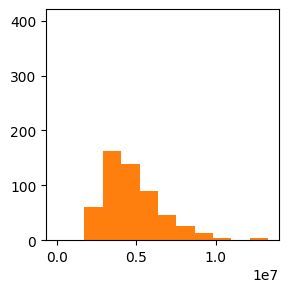

In [15]:
plt.figure(figsize=(3,3))
plt.hist(data['bedrooms'])
plt.hist(data['price'])
plt.hist(data['bathrooms'])
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [24]:
obj_cols = [col for col in data.columns if type(data[col][0])==str]
for col in obj_cols:
    print(col, data[col].unique())

mainroad ['yes' 'no']
guestroom ['no' 'yes']
basement ['no' 'yes']
hotwaterheating ['no' 'yes']
airconditioning ['yes' 'no']
prefarea ['yes' 'no']
furnishingstatus ['furnished' 'semi-furnished' 'unfurnished']


In [47]:
data = pd.get_dummies(data,columns=obj_cols , drop_first=True)

In [48]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [49]:
corro = data.corr()

<Axes: >

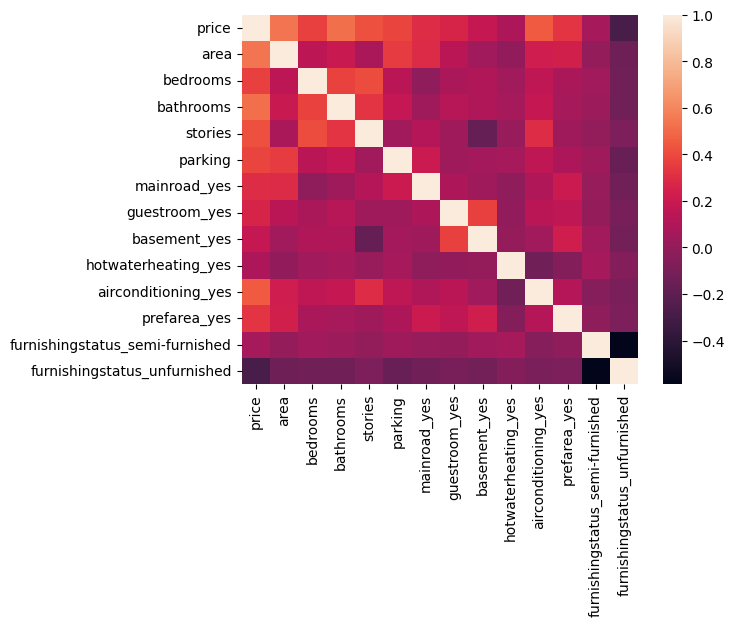

In [55]:
sns.heatmap(corro)

# Training

In [57]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

In [64]:
X = data.drop(["price"], axis=1)
y = data['price']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [66]:
lasso = Lasso(alpha=0.2)
lasso.fit(x_train, y_train)

Lasso(alpha=0.2)

In [67]:
lasso.coef_

array([ 2.35969025e+02,  7.67785809e+04,  1.09444418e+06,  4.07476794e+05,
        2.24841953e+05,  3.67918580e+05,  2.31609074e+05,  3.90251131e+05,
        6.84645383e+05,  7.91425936e+05,  6.29889732e+05, -1.26879994e+05,
       -4.13643392e+05])

In [70]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [72]:
lasso.score(x_train, y_train), lasso.score(x_test, y_test)

(0.6859438988552053, 0.6529241621146766)

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [88]:
y_pred = lasso.predict(x_test)

print("mean_squared_error", mean_squared_error(y_test, y_pred))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred))
print("r2_score", r2_score(y_test, y_pred))
import numpy as np
# from numpy import mean
# from numpy import std
# from numpy import absolute


mean_squared_error 1754319203405.5298
mean_absolute_error 970043.489695295
r2_score 0.6529241621146766


Note:

In scikit-learn's cross_val_score higher scores are considered better by default (maximimizing). To maintain this convention, scikit-learn inverts or negates the error values, since lower error is better.

In [90]:
# cross-validation

from sklearn.model_selection import cross_val_score, RepeatedKFold

model = Lasso(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x_train, y_train, scoring="neg_mean_absolute_error", cv=cv)

scores = np.absolute(scores)
np.mean(scores), np.std(scores)


(749628.9431856722, 71847.09851849481)

In [94]:
model = Lasso(alpha=1.0)
cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x_train, y_train, cv=cv, scoring= "r2")
np.mean(scores), np.std(scores)

(0.6348307100706417, 0.09969563995855384)

### GridSearch

In [102]:
from sklearn.model_selection import GridSearchCV

model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = np.arange(0.1,1,0.2)
search = GridSearchCV(model, grid, cv=cv, scoring="r2")
results = search.fit(x_train, y_train)
print("best_params: ",results.best_params_)
print("best_score: ",results.best_score_)

best_params:  {'alpha': 0.9000000000000001}
best_score:  0.6348307077330628


In [106]:
from sklearn.preprocessing import MinMaxScaler

scalling = MinMaxScaler()
scalling.fit(x_train)

x_train_transformed = scalling.transform(x_train)
x_test_transformed = scalling.transform(x_test)



In [110]:
model = Lasso(alpha=0.9)
model.fit(x_train_transformed, y_train)
model.score(x_train_transformed, y_train), model.score(x_test_transformed, y_test)


(0.685943898824375, 0.6529233707164083)

In [115]:
cv = RepeatedKFold(n_splits=10, n_repeats=3)
grid = dict()
grid['alpha'] = np.arange(0.1, 1, 0.1)
search = GridSearchCV(model, grid, cv=cv, scoring="r2")
results = search.fit(x_train_transformed, y_train)

results.best_score_, results.best_params_

(0.635229328046272, {'alpha': 0.9})